In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [142]:
pd.set_option('display.max_columns', None)

df=pd.read_csv("../Dataset/spaceship_titanic_train.csv")
X_test=pd.read_csv("../Dataset/spaceship_titanic_test.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [143]:
df.shape

(8693, 14)

In [144]:
df.drop(columns=["PassengerId","Name"],inplace=True)
X_test.drop(columns=["Name"],inplace=True)

In [145]:
df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [146]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [147]:
print(df.HomePlanet.value_counts())
print(df.CryoSleep.value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
CryoSleep
False    5439
True     3037
Name: count, dtype: int64


In [148]:
def fill_na(df):
    df["HomePlanet"].fillna(df["HomePlanet"].mode()[0], inplace=True)
    df["CryoSleep"].fillna(False, inplace=True)
    df["Cabin"].fillna(df["Cabin"].mode()[0], inplace=True)
    df["Destination"].fillna(df["Destination"].mode()[0], inplace=True)
    df["VIP"].fillna(False, inplace=True)
    # Numerical features with mean/median
    df["Age"].fillna(df["Age"].median(), inplace=True)
    spending_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for col in spending_cols:
        df[col].fillna(0, inplace=True)

In [149]:
fill_na(df)
fill_na(X_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7428\508557188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["HomePlanet"].fillna(df["HomePlanet"].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7428\508557188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [150]:
df.shape

(8693, 12)

In [151]:
X_test.shape

(4277, 12)

In [152]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [153]:
X_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

<Axes: >

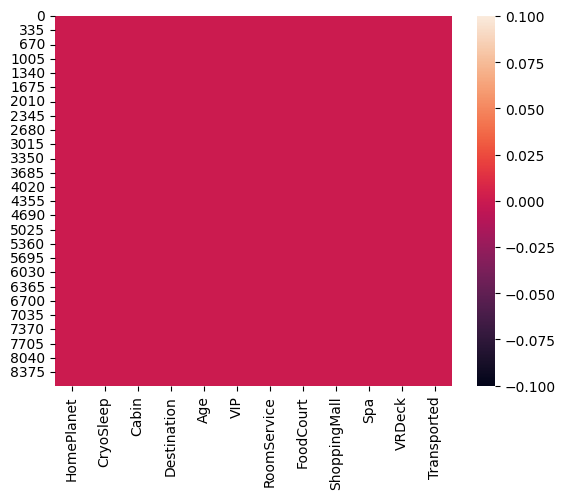

In [154]:
sns.heatmap(df.isnull())

<Axes: >

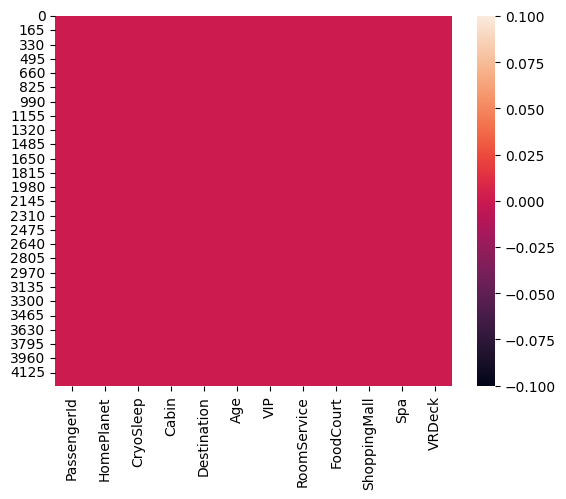

In [155]:
sns.heatmap(X_test.isnull())

In [156]:
def deck_split(x):
    if pd.isna(x):
        return None
    else:
        deck,_,_=x.split("/")
        return deck
    
def num_split(x):
    if pd.isna(x):
        return None
    else:
        _,num,_=x.split("/")
        return int(num)
def side_split(x):
    if pd.isna(x):
        return None
    else:
        _,_,side=x.split("/")
        return side

print((deck_split("w/233/p")))
print(num_split("w/233/p"))
print(side_split("w/233/p"))


w
233
p


In [157]:
# def split_cabin(cabin):
#     if pd.isna(cabin):
#         return None, None, None
#     parts = str(cabin).split("/")
#     return (parts[0] if len(parts) > 0 else None,  
#             parts[1] if len(parts) > 1 else None,  
#             parts[2] if len(parts) > 2 else None)

In [158]:
df[['Deck']]=df['Cabin'].apply(deck_split).apply(pd.Series)
df[['Num']]=df['Cabin'].apply(num_split).apply(pd.Series)
df[['Side']]=df['Cabin'].apply(side_split).apply(pd.Series)

X=df

In [159]:
X_test[['Deck']]=X_test['Cabin'].apply(deck_split).apply(pd.Series)
X_test[['Num']]=X_test['Cabin'].apply(num_split).apply(pd.Series)
X_test[['Side']]=X_test['Cabin'].apply(side_split).apply(pd.Series)

In [160]:
df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S


In [161]:
df.Destination.value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [162]:
test1=df.groupby(by="Deck")

<Axes: xlabel='Deck'>

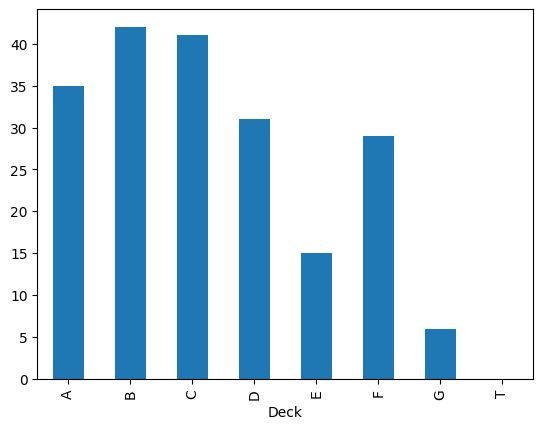

In [163]:
test1.VIP.sum().plot(kind="bar")

#### This shows people who bought VIP purchase mostly stayed in A,B,C

<Axes: xlabel='CryoSleep'>

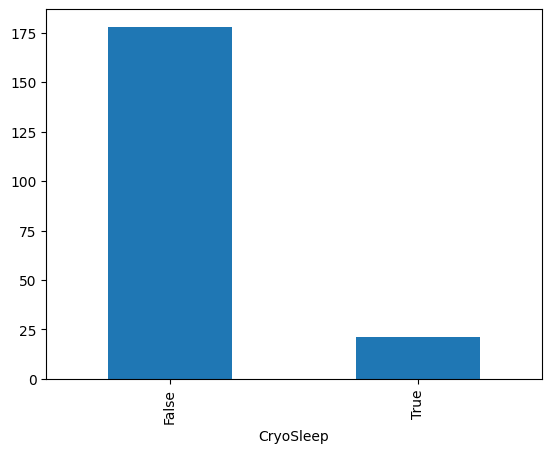

In [164]:
test2=df.groupby(by="CryoSleep")
test2.VIP.sum().plot(kind="bar")

#### This shows people who bought VIP purchase didnt use CryoSleep

<Axes: xlabel='Destination'>

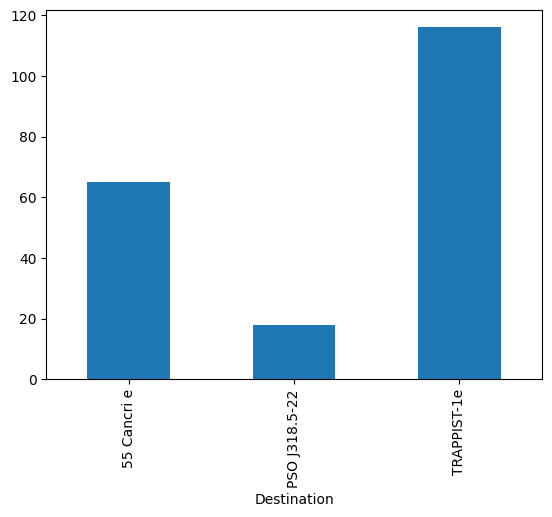

In [165]:
test3=df.groupby(by=["Destination"])
test3.VIP.sum().plot(kind="bar")

#### This shows people who bought VIP purchase mostly went to TRAPPIST-1e and then 55 Cancri e

<Axes: xlabel='Side,VIP'>

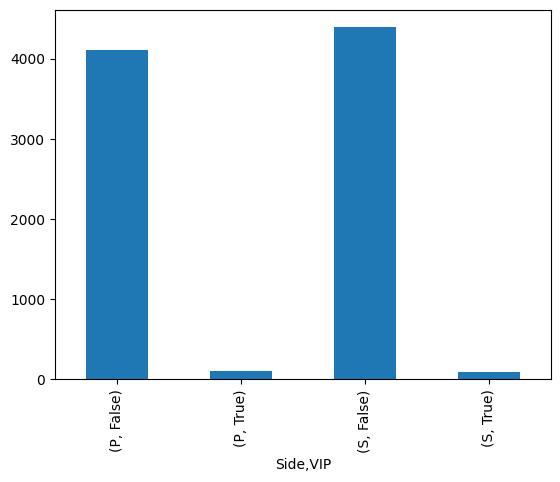

In [166]:
test3=df.groupby(by="Side")
test3.VIP.value_counts().plot(kind="bar")

#### People who did not buy VIP used P side much

In [167]:
df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S


In [168]:
X_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S


In [169]:
df["CryoSleep"] = df["CryoSleep"].astype(int)
df["VIP"] = df["VIP"].astype(int)

In [170]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
encoder = OneHotEncoder(drop='first', sparse_output=False)
    
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out())
df = df.drop(columns=categorical_cols)
new_df = pd.concat([df, encoded_features], axis=1)


In [171]:
categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
encoder2 = OneHotEncoder(drop='first', sparse_output=False)
    
encoded_features = pd.DataFrame(encoder2.fit_transform(X_test[categorical_cols]), columns=encoder2.get_feature_names_out())
X_test = X_test.drop(columns=categorical_cols)
x_test_new_df = pd.concat([X_test, encoded_features], axis=1)

<Axes: >

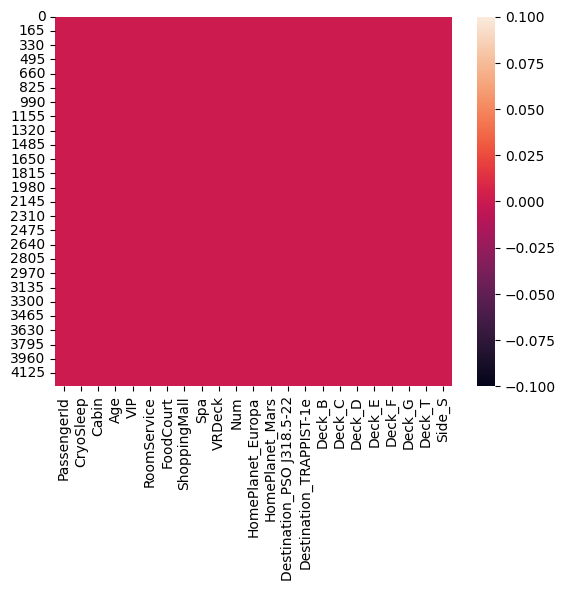

In [172]:
sns.heatmap(x_test_new_df.isna())

In [173]:
# target_columns=["Destination","Deck","Side"]
# for i in target_columns:
#     label=LabelEncoder()
#     new_df[i]=label.fit_transform(new_df[[i]])
#     x_test_new_df[i]=label.fit_transform(x_test_new_df[[i]])

In [174]:
new_df.drop(columns=["Cabin"],inplace=True)
x_test_new_df.drop(columns=["PassengerId","Cabin"],axis=1,inplace=True)

In [175]:
new_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [176]:
x_test_new_df.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_S                       0
dtype: int64

In [177]:
new_df.VIP=new_df.VIP.astype("int")
new_df.Transported=new_df.Transported.astype("int")

x_test_new_df.VIP=x_test_new_df.VIP.astype("int")
x_test_new_df.CryoSleep=x_test_new_df.CryoSleep.astype("int")
new_df.dtypes

CryoSleep                      int32
Age                          float64
VIP                            int32
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int32
Num                            int64
HomePlanet_Europa            float64
HomePlanet_Mars              float64
Destination_PSO J318.5-22    float64
Destination_TRAPPIST-1e      float64
Deck_B                       float64
Deck_C                       float64
Deck_D                       float64
Deck_E                       float64
Deck_F                       float64
Deck_G                       float64
Deck_T                       float64
Side_S                       float64
dtype: object

In [178]:
new_df.shape # DUe to Transported, one column is more

(8693, 22)

In [179]:
x_test_new_df.shape

(4277, 21)

In [180]:
new_df.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [181]:
X=new_df.drop(columns=["Transported"])
Y=new_df["Transported"]

In [182]:
# categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
# encoder2 = OneHotEncoder(drop='first', sparse_output=False)
    
# encoded_features2 = pd.DataFrame(encoder2.fit_transform(df[categorical_cols]), columns=encoder2.get_feature_names_out())
# x_test_new_df = x_test_new_df.drop(columns=categorical_cols)
# x_test_new_df = pd.concat([x_test_new_df, encoded_features2], axis=1)

In [183]:

scaler=StandardScaler()
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
x_test_new_df[numerical_cols] = scaler.transform(x_test_new_df[numerical_cols])

In [184]:
Y.head(3)

0    0
1    1
2    0
Name: Transported, dtype: int32

In [185]:
X.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.191744,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,-1.191744,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,-1.191744,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
X.shape

(8693, 21)

In [187]:
x_test_new_df.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,1,-0.124841,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.185819,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,-0.682698,0,-0.333105,-0.275387,-0.283579,2.237598,-0.263003,-1.183844,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0.154088,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-1.191744,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
x_test_new_df.shape

(4277, 21)

In [189]:
import ydf

In [190]:
ydf_model=ydf.RandomForestLearner(
    label="Transported",
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=1.0,
    growing_strategy="BEST_FIRST_GLOBAL",
    num_candidate_attributes_ratio=0.9,
    task=ydf.Task.CLASSIFICATION
    ).train(new_df)

Train model on 8693 examples
Model trained in 0:00:01.214193


In [191]:
predict_y=ydf_model.predict(x_test_new_df)
predict_y=predict_y>.5

In [192]:
tr=1
for i in predict_y:
    if i ==True:
        tr+=1
print(tr)
print(len(predict_y)-tr)

4278
-1


In [193]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(predict_y,y_test))

# Tensorflow

In [194]:
# model=tf.keras.Sequential()

# model.add(tf.keras.layers.Dense(units=85,activation=tf.nn.relu,input_shape=[X.shape[1],]))
# model.add(tf.keras.layers.Dense(units=68,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(units=38,activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid))


In [195]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = tf.keras.Sequential([
    Dense(80, activation='relu', kernel_initializer='he_normal', input_shape=[X.shape[1],]),
    BatchNormalization(),
    Dropout(0.25),

    Dense(65, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(25, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(1, activation='sigmoid')
])


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [196]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 80)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 65)             │         5,265 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 65)             │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 65)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,381 (36.64 KB)

 Trainable params: 9,041 (35.32 KB)

 Non-trainable params: 340 (1.33 KB)

In [197]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision'])

In [198]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_Precision', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=25, restore_best_weights=True
)

In [199]:
history=model.fit(X,Y,epochs=150,validation_split=0.2,batch_size=32,callbacks=[early_stopping,lr_scheduler])

Epoch 1/150
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7873 - Precision: 0.7163 - accuracy: 0.7034 - loss: 0.5516 - val_AUC: 0.8771 - val_Precision: 0.6839 - val_accuracy: 0.7527 - val_loss: 0.5244 - learning_rate: 0.0100
Epoch 2/150
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8727 - Precision: 0.7966 - accuracy: 0.7802 - loss: 0.4404 - val_AUC: 0.8760 - val_Precision: 0.6791 - val_accuracy: 0.7499 - val_loss: 0.5136 - learning_rate: 0.0100
Epoch 3/150
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8781 - Precision: 0.7911 - accuracy: 0.7878 - loss: 0.4356 - val_AUC: 0.8765 - val_Precision: 0.7254 - val_accuracy: 0.7815 - val_loss: 0.4989 - learning_rate: 0.0100
Epoch 4/150
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8868 - Precision: 0.8095 - accuracy: 0.8010 - loss: 0.4193 - val_AUC: 0.8856 - val_Precision: 0.7235 - val_accuracy: 0.7832 - val_loss: 0.4486 - learning_rate: 0.0100
Epoch 5/150
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8748 - Precision: 0.80

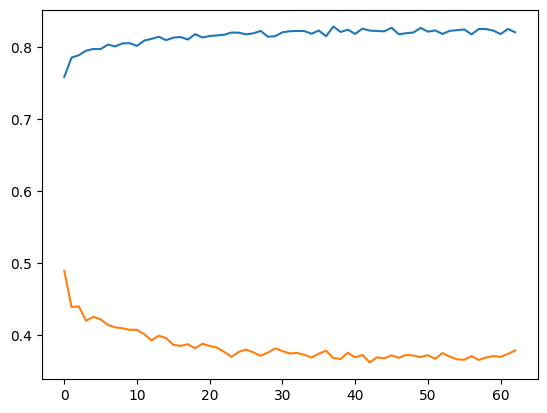

In [200]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])

In [201]:
result=model.predict(x_test_new_df)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [202]:
result.shape

(4277, 1)

In [203]:
result=result>=.5

In [204]:
tr=0
for i in result:
    if i ==True:
        tr+=1
print(tr)
print(len(predict_y)-tr)

2159
2118


In [205]:
X_test[["PassengerId"]]

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [206]:
print(X_test.PassengerId.shape)  # This should output a 1-dimensional array's shape
print(result.shape)  # Same for result


(4277,)
(4277, 1)


In [207]:
X_test.PassengerId = X_test.PassengerId.ravel()  # Flatten if needed
result = result.ravel()  # Flatten if needed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7428\144233026.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_test.PassengerId = X_test.PassengerId.ravel()  # Flatten if needed


In [208]:
print(X_test.PassengerId.shape)  # This should output a 1-dimensional array's shape
print(result.shape) # Same for resultt

(4277,)
(4277,)


In [209]:
submission = pd.DataFrame({
    "PassengerId": X_test.PassengerId,
    "Transported": result
})
submission.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [210]:
submission.to_csv("spaceship_titanic.csv",index=False)